# <font color= #900C3F >Natural Resources Rents vs Education Expenditure - Exploring the World Development Indicators Dataset</font> 
This project will use the World Development Indicators Dataset,'Indicators.csv', which includes 6 columns: 'CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year' and 'Value'. The subject of research will be taken out of the 'IndicatorName' column.

Download dataset at: https://www.kaggle.com/worldbank/world-development-indicators <br>
For the code to work, the dataset needs to be saved in a folder named "Data".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Open the dataset and set display values

indicators_df = pd.read_csv('Data/Indicators.csv')
pd.set_option('display.max_rows', 6000000)#Display as much rows as possible

In [3]:
#Explore the names of the columns
indicators_df.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [4]:
#Explore the subjects of study in the column "IndicatorName". It will show ALL the rows, 
#so uncomment only when needed.
# pd.value_counts(indicators_df['IndicatorName'])

In [5]:
#Show how many indicators have information about rents as % of GDP:
rents_filter = indicators_df['IndicatorName'].str.contains('rents',case=False)
rents = indicators_df[rents_filter]
print('*Rents indicators:',rents['IndicatorName'].unique())

#Show how many indicators have information about education expenditure:
edu_filter = indicators_df['IndicatorName'].str.contains(r'^(?=.*education)(?=.*expenditure)')#Used regex                                                         case=False)
edu = indicators_df[edu_filter]
print('*Education indicators',edu['IndicatorName'].unique())

*Rents indicators: ['Coal rents (% of GDP)' 'Forest rents (% of GDP)'
 'Mineral rents (% of GDP)' 'Natural gas rents (% of GDP)'
 'Oil rents (% of GDP)' 'Total natural resources rents (% of GDP)']
*Education indicators ['Adjusted savings: education expenditure (% of GNI)'
 'Adjusted savings: education expenditure (current US$)'
 'Government expenditure on education as % of GDP (%)'
 'Expenditure on primary as % of government expenditure on education (%)'
 'Expenditure on secondary as % of government expenditure on education (%)'
 'Expenditure on tertiary as % of government expenditure on education (%)'
 'Expenditure on education as % of total government expenditure (%)'
 'All education staff compensation, primary (% of total expenditure in primary public institutions)'
 'All education staff compensation, secondary (% of total expenditure in secondary public institutions)'
 'All education staff compensation, tertiary (% of total expenditure in tertiary public institutions)'
 'All educat

In [6]:
#Choosing 'Total natural resources rents (% of GDP)' indicator
NRrents_filter = indicators_df['IndicatorName'] == 'Total natural resources rents (% of GDP)'
#Choosing 'Government expenditure on education as % of GDP (%)' indicator
eduex_filter = indicators_df['IndicatorName'] == 'Government expenditure on education as % of GDP (%)'

focused_df = indicators_df[NRrents_filter|eduex_filter]
#Checking for null values in the 'eduex_df' dataframe:
print('Are there any null values in the ifilter_df dataframe?:',focused_df['Value'].isna().values.any())
print('Total null values in the ifilter_df dataframe:',focused_df['Value'].isna().sum())

Are there any null values in the ifilter_df dataframe?: False
Total null values in the ifilter_df dataframe: 0


## Research Question: Are countries that invest the most in education lowering their dependency on natural resources rents?
As the world depletes its natural resources, countries that make a profit out of them should start shifting their attention towards other sources of income. There's an understanding that by strengthening the educational system so that citizens have the tools to become producers and traders of knowledge and technology, the human capital gained would bring higher income than that brought by the sale of natural resources. In theory, countries that produce knowledge have less reason to depend on extractivism (i.e. the economic model that relies on extraction of natural resources). If the following statement is true: "The easier it is for governments to extract rents from external sources (by selling oil, gas, or minerals), the less dependent they are on their populations, and the more prone they are to neglect investing in human capital", then there's a lead to find out if the opposite is true.  If growing investment in education shows an inverse correlation with a country's natural resources rents as a percentage of GDP, then a formula for reducing extractivism can be traced.

C:\Users\JORGE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


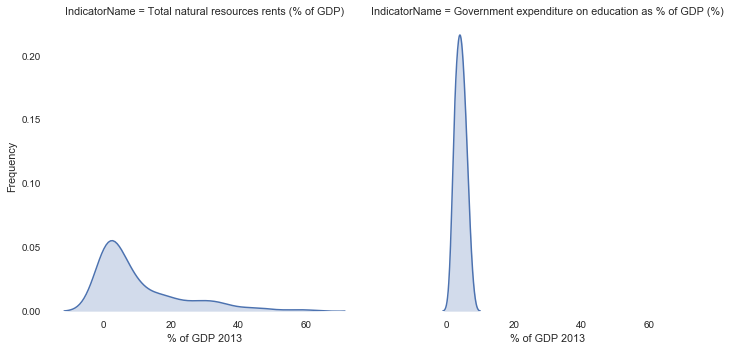

Graph 1. A comparison of this two kernel density plots show that most countries have total
natural resources rents in between 0 and around 15% of the GDP. More notorious is the plot
on the right which shows most governments invest very little of the GDP in education,
from 0 to around 5% of the GDP in the year 2013


In [7]:
#Distribution of data for the year 2013, since there's no rents data for the year 2014:
year_mask = focused_df['Year']==2013
data_2013 = focused_df[year_mask]

#Plot a kernel density plot (similar to histogram)
sns.set(font_scale=0.9)
sns.set_style('white')
g = sns.FacetGrid(data_2013,col='IndicatorName',height=5,)
g.map(sns.kdeplot,'Value',shade=True).set_axis_labels('% of GDP 2013','Frequency')
sns.despine(left=True,bottom=True)
plt.show()

print('Graph 1. A comparison of this two kernel density plots show that most countries have total\n\
natural resources rents in between 0 and around 15% of the GDP. More notorious is the plot\n\
on the right which shows most governments invest very little of the GDP in education,\n\
from 0 to around 5% of the GDP in the year 2013')

In [8]:
#Take a look at the range of years showing up:
print('Years',focused_df['Year'].min(),'to',focused_df['Year'].max())

#Many countries don't have a data for all the years. A filter needs to be created
#to ignore all countries that don't have enough years of data.
#Create a group before eliminating countries that don't have enough years.
education_years = focused_df['IndicatorName'].str.contains('education',case=False)
print('The Education Indicator has (a) country(ies) with max',
      focused_df[education_years]['CountryCode'].value_counts().max(),'years of data.')

rent_years = focused_df['IndicatorName'].str.contains('rents',case=False)
print('The Rents Indicator has (a) country(ies) with max',
      focused_df[rent_years]['CountryCode'].value_counts().max(),'years of data.')

Years 1970 to 2014
The Education Indicator has (a) country(ies) with max 42 years of data.
The Rents Indicator has (a) country(ies) with max 44 years of data.


In [9]:
#The Government expenditure on education as % of GDP (%)
#has less years of data. A threshold must be established to get as much countries as possible
#that have something around 42 years of data.
#by looking at the number of times a country appears in the dataset holding the education indicator
#we can see how many years of data it has. The following code shows a list of 20 countries with the
#most years of data.
most_years = focused_df[focused_df['IndicatorName']=='Government expenditure on education as % of GDP (%)'
                              ]['CountryName'].value_counts()

titles = pd.Series(['Years of Data'],index=['Country'])#Set titles to show in output
titles.append(most_years.head(20))

Country               Years of Data
France                           42
Netherlands                      40
Austria                          40
Ireland                          39
Finland                          39
Norway                           39
Thailand                         38
Pakistan                         38
United Kingdom                   37
Canada                           36
Portugal                         36
Korea, Rep.                      36
Israel                           36
Iran, Islamic Rep.               36
Morocco                          35
Argentina                        34
Japan                            34
Denmark                          33
New Zealand                      33
Cyprus                           33
dtype: object

In [10]:
#Filtering by the countries found in the list above. 
#The threshold would be 30 years of data, so now countries that have less than 30 years
#will be eliminated and countries with more than 30 years will have years removed so the average can be
#done over 30 years for all countries. The purpose is to get a mean = sum(values)/30years for each country.
edu_df = focused_df[focused_df['CountryName'].isin(most_years.index)]
#Filter Education Indicator
edu_df = focused_df[focused_df['IndicatorName']=='Government expenditure on education as % of GDP (%)']

def getEqualYearsMean(df,index_col,value_cols,threshold):
    '''df = dataframe, index_col = df column to set as index,
    value_cols = list of df columns to gather values from, 
    threshold = items must have this amount of years (int).
    This function removes the years with the least values from countries that exceed the number in 
    the threshold. It then gets a mean by dividing the sum of values by the same amount of years for 
    each country. Returns a dataframe of countries ranked by value of mean.'''
    threshold = threshold #Anything that occurs less than or more than this will be removed.
    newIndex = df.set_index(index_col)#set new index to make selection by index posible
    values = newIndex.index.value_counts() #Count ocurrences of index values
    to_keep = values[values>=threshold].index.values #Keep index values that ocurr > threshold
    rank_df = newIndex.loc[to_keep,value_cols]#Select rows and columns to keep
    #Sort values in descending order to meet threshold
    rank_df = rank_df.sort_values(value_cols[1],ascending=False)
    rank_df = rank_df.groupby(rank_df.index).head(threshold)#group again 
    #Since values are sorted, head() will show highest values
    rank_df = rank_df.groupby([rank_df.index,value_cols[0]]).mean() \
                  .sort_values(value_cols[1],ascending=False)#Sort values of final dataframe
    rank_df = rank_df.reset_index(level=1)#Reset index to convert the 2nd index into a column
    
    return rank_df

# #Ranking countries with the highest average Government expenditure on education as % of GDP indicator:
# #Show top 10 countries with the highest average. 
high_edurank_df = getEqualYearsMean(edu_df,'CountryName',['CountryCode','Value'],30)
high_edurank_df.head(10)

,CountryCode,Value
CountryName,,
Denmark,DNK,7.290294
Israel,ISR,6.943403
Norway,NOR,6.831749
Canada,CAN,6.484014
Finland,FIN,5.958406
Netherlands,NLD,5.760213
Morocco,MAR,5.723541
New Zealand,NZL,5.657557
Austria,AUT,5.418203


In [11]:
#Function to produce a map given a list of countries and values.
import requests #Import to use the locateAndCreateBubbleMap() properly.
import folium
from IPython.display import IFrame, display, HTML#For rendering HTML file

def locateAndCreateBubbleMap(df,df_value,countries,colors,title,saveHTML):
    '''Find locations of countries and plot a Bubble Map with circle markers.
    df = Dataframe, df_value = Value to use for the circle size, countries = 
    list of countries, colors = list of colors, title = string of text
    Returns a bubble map with circle markers representing each country, the
    size of the circle being the scaled value to represent.'''
    
    locations = []#Locations in [lat,lon] format
    for c in df.index:#Iterate over list of country names
        #Use this url to get country locations by inserting the country name
        url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                                 c,
                                 '&format=json&polygon=0')
        response = requests.get(url).json()[0]
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
        locations.append(output)
        
    print('\033[1m' + title + '\033[0m')#Title of map
    
    m = folium.Map(width=600,height=360,
                  location=[31,20],
                  tiles='openstreetmap',zoom_start=1.4
                  )

    for i in range(len(df)):
        folium.CircleMarker(location=(locations[i][0], locations[i][1]),
                            radius= df[df_value].values[i]*1.1,
                            color=colors[i],
                            opacity=0.65,
                            fill=colors[i],
                            fill_opacity=0.6,
                            tooltip='<b><font color=%(color)s><tooltiptext=background-color:#616161e6>%(country)s \
                            <br/>Mean: %(mean)s</font> \
                            </b>'%{'color':colors[i],'country':df.index[i],
                              'mean':'{:.3f}'.format(df[df_value].values[i])}
                           ).add_to(m)
    #save to HTML file
    m.save(saveHTML)



colors = ['#e6194b','#3cb44b','#641e16 ','#4363d8','#f58231','#911eb4','#f28500','#f032e6', 
          '#145a32 ','#16a085 ']
locateAndCreateBubbleMap(high_edurank_df.head(10),'Value',
                         high_edurank_df.head(10).index,colors,
                         "Map 1. Top 10 Countries with Highest Education Expenditure Average",
                         'Map_1.html')

#Display HTML file saved when executing locateAndCreateBubbleMap() function:
IFrame('Map_1.html', width=610, height=370)

Map 1. Top 10 Countries with Highest Education Expenditure Average


Map_1.html made with Folium can't be visualized on GitHub. [Try this link to open map1.geojson visualization](https://github.com/marchhombre/Natural-Resources-Rents-and-Education/blob/master/map1.geojson)     

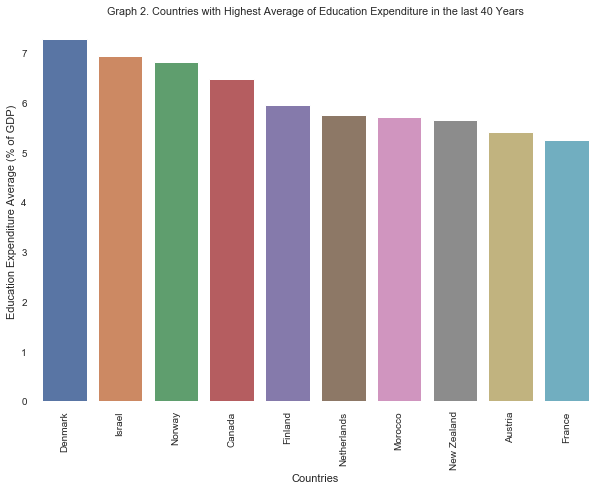

In [12]:
#Plotting a simple bar graph showing the top 10 countries comparison:
country = high_edurank_df.head(10).index
values = high_edurank_df.head(10)['Value'].values
plt.figure(figsize=(10,7))
sns.barplot(country,values)
plt.title('Graph 2. Countries with Highest Average of Education Expenditure in the last 40 Years')
plt.xticks(rotation='vertical',fontsize=10)
plt.xlabel('Countries',fontsize=11)
plt.ylabel('Education Expenditure Average (% of GDP)',fontsize=11)
sns.despine(left=True,bottom=True)
plt.show()

In [13]:
#Filter rents and education dataframe to show only 5 top countries:
top_5_df = focused_df[focused_df['CountryName'].isin(high_edurank_df.head().index)]

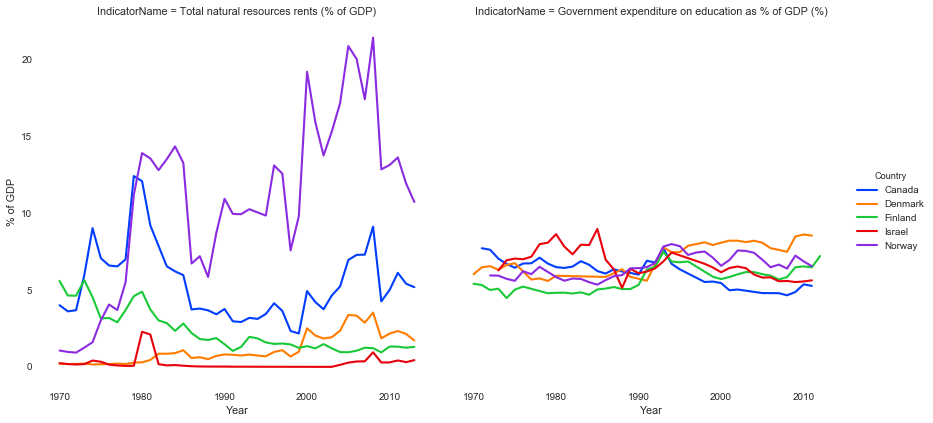

Graph 3. 3 out of the 5 countries show a greater percentage in expenditure in education
than a percentage of natural resources rents as part of the GDP. Canada and Norway are the
exception, even though their final results have a downward trend in the rents indicator.
The education indicator shows that this countries have been spending between 5% and 10% of the GDP
in the past 40+ years


In [14]:
#Plot two charts to compare the Education indicator with the Rents indicator over time:
g2 = sns.FacetGrid(top_5_df,col='IndicatorName',height=6,hue='CountryName',palette='bright')
g2.map(sns.lineplot,'Year','Value',linewidth=2.1).set_axis_labels('Year','% of GDP')
g2.add_legend(title='Country')
sns.despine(left=True,bottom=True)
plt.show()
print('Graph 3. 3 out of the 5 countries show a greater percentage in expenditure in education\n\
than a percentage of natural resources rents as part of the GDP. Canada and Norway are the\n\
exception, even though their final results have a downward trend in the rents indicator.\n\
The education indicator shows that this countries have been spending between 5% and 10% of the GDP\n\
in the past 40+ years')

In [15]:
#Correlation between the variables:

def correlation(df,CountryName,variable1,variable2):
    '''Returns the correlation after filtering the main dataframe df to avoid errors.
    df = dataframe, CountryName = type str, country name as it appears in df, 
    variable1 = type str, first indicator name as it appears on df
    variable2 = type str, second indicator name as it appears on df
    Returns the variable correlation for a country'''
    country_filt = df['CountryName']==CountryName
    country_df = df[country_filt]
    #Filtering to make sure both variables appear for the same year
    #in order to make a correlation counting variable1, variable2 for year1, var1, var2 for year2, etc. 
    year_filt = country_df['Year'].value_counts() == 2 #2 is for the two variables
    country_df = country_df[country_df['Year'].isin(year_filt[year_filt==True].index)]

    country_corr = np.corrcoef(country_df[country_df['IndicatorName']==
                           'Government expenditure on education as % of GDP (%)']['Value'],
                           country_df[country_df['IndicatorName']==
                                      'Total natural resources rents (% of GDP)']['Value'])
    
    return country_df,round(country_corr[0][1],5)

#Loop through the top five countries and print their correlation
for country in high_edurank_df.head().index:
    print(country,'correlation between indicators is:',correlation(focused_df,country,
                              'Government expenditure on education as % of GDP (%)',
                              'Total natural resources rents (% of GDP)')[1])

Denmark correlation between indicators is: 0.69775
Israel correlation between indicators is: 0.26499
Norway correlation between indicators is: 0.28149
Canada correlation between indicators is: -0.00549
Finland correlation between indicators is: -0.62296


Graph 4.


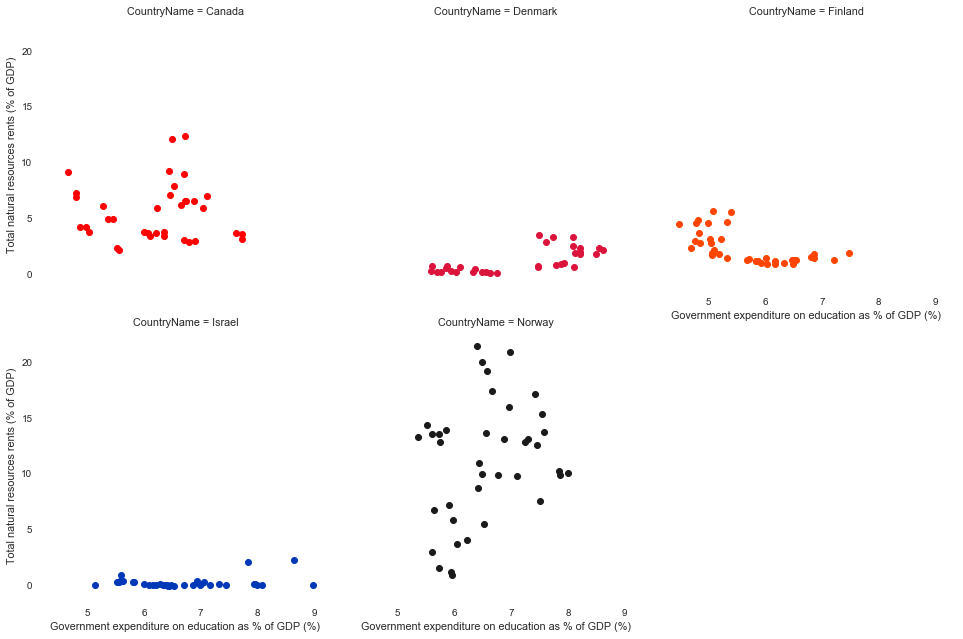

In [16]:
#SCATTER PLOTS (plotting the correlation between the indicators)
print('Graph 4.') 
#Pivot so a new table is created with a column for each indicator:
scatter_df = pd.pivot_table(top_5_df,values='Value',columns='IndicatorName',index=['CountryName','Year'])
#create again the column 'CountryName' because pivot_table turned it into an index:
scatter_df['CountryName'] = scatter_df.index.get_level_values('CountryName')

#using the seaborn code to produce the scatter plots for each country:
g3 = sns.FacetGrid(scatter_df,col='CountryName',col_wrap=3,height=4.5,
                   hue='CountryName',palette=['#FF0000','#DC143C','#FF4500','#0038b8','k'])
g3.map(plt.scatter,
       'Government expenditure on education as % of GDP (%)',
       'Total natural resources rents (% of GDP)')
sns.despine(left=True,bottom=True)
plt.show()

## Now is time to compare the opposite premise: Are countries receiving the most rents from natural resources investing less in education, according to the GDP %?

Unfortunately, the countries with highest natural resources rents as a % of GDP don't have enough years of data for their Expenditure in Education indicator. A compromise has to be made so that we get countries with high rents average and enough years of education expenditure.

In [17]:
#Taking the rents indicator and performing the same operations done on the education indicator:
#How many years of data does each country have for this indicator?
most_years = focused_df[focused_df['IndicatorName']=='Total natural resources rents (% of GDP)'
                              ]['CountryName'].value_counts()
most_years.head(20)

Kenya                                          44
Other small states                             44
Malawi                                         44
Guatemala                                      44
High income: nonOECD                           44
Dominican Republic                             44
Finland                                        44
Ecuador                                        44
Norway                                         44
Sub-Saharan Africa (developing only)           44
Kiribati                                       44
Congo, Rep.                                    44
Upper middle income                            44
Europe & Central Asia (all income levels)      44
Fragile and conflict affected situations       44
Argentina                                      44
Botswana                                       44
Latin America & Caribbean (developing only)    44
Turkey                                         44
Netherlands                                    44


In [18]:
#Most countries have 44 years of data for the rents indicator.
#Here's a list choosing the countries with highest average
#of rents as % of GDP, keeping in mind that most of this countries have little data
#for the education expenditure indicator:

rents_df = focused_df[focused_df['CountryName'].isin(most_years.index)]
#Filter Rents Indicator
rents_df = focused_df[focused_df['IndicatorName']=='Total natural resources rents (% of GDP)']

# Use the getEqualYearsMean() function created in this project to get the highest averages:
high_rentsrank_df = getEqualYearsMean(rents_df,'CountryName',['CountryCode','Value'],44)
high_rentsrank_df.head(10)

,CountryCode,Value
CountryName,,
"Congo, Rep.",COG,47.374928
Oman,OMN,44.158150
Gabon,GAB,41.568302
Liberia,LBR,36.654606
Nigeria,NGA,35.465740
Trinidad and Tobago,TTO,31.827594
Papua New Guinea,PNG,30.282738
Arab World,ARB,29.564228
"Venezuela, RB",VEN,27.497459


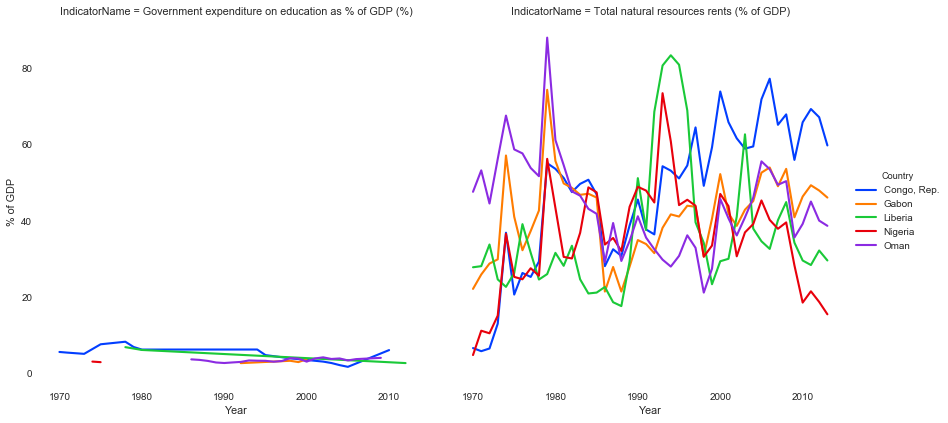

Graph 5. Note that this countries don't have enough years of data for the 
Education Expenditure as a % of GDP indicator, as seen in the case of Nigeria.


In [19]:
#Filter rents and education dataframe to show only 5 top countries with highest rents average:
top_5_rentsdf = focused_df[focused_df['CountryName'].isin(high_rentsrank_df.head().index)]

#Plot two charts to compare the Education indicator with the Rents indicator over time:
g4 = sns.FacetGrid(top_5_rentsdf,col='IndicatorName',height=6,hue='CountryName',palette='bright')
g4.map(sns.lineplot,'Year','Value',linewidth=2.1).set_axis_labels('Year','% of GDP')
g4.add_legend(title='Country')
sns.despine(left=True,bottom=True)
plt.show()   
print("Graph 5. Note that this countries don't have enough years of data for the \n\
Education Expenditure as a % of GDP indicator, as seen in the case of Nigeria.")

In [20]:
most_years = top_5_rentsdf[top_5_rentsdf['IndicatorName']=='Government expenditure on education as % of GDP (%)'
                              ]['CountryName'].value_counts()
titles = pd.Series(['Years of Data'],index=['Country'])
titles.append(most_years)

Country        Years of Data
Oman                      22
Congo, Rep.               15
Liberia                    4
Gabon                      4
Nigeria                    2
dtype: object

In [21]:
#The countries with highest natural resources rents average have to be selected
#from a list of countries that have enough years of data for the Education Expenditure indicator.
#Since Congo has 15 years worth of Education Expenditure data, and has a high rents income average,
#15 will be the threshold argument in the function getEqualYearsMean().

#Since a dataframe called edu_df has already been created, it will be 
#used to filter countries with more than or equal to 15 years of education expenditure data:
edu14_yr_df = getEqualYearsMean(edu_df,'CountryName',['CountryCode','Value'],15)
edu14_yr_df.head()

,CountryCode,Value
CountryName,,
Lesotho,LSO,11.909860
Cuba,CUB,9.779445
Denmark,DNK,8.108822
Israel,ISR,7.613139
Norway,NOR,7.359431


In [22]:
#The dataframe above gives us a list of countries to choose for the highest rents average:
new_rents_df = focused_df[focused_df['CountryName'].isin(edu14_yr_df.index)]
#Filter Rents Indicator
new_rents_df = new_rents_df[new_rents_df['IndicatorName']=='Total natural resources rents (% of GDP)']

#Use the getEqualYearsMean() function created in this project to get the highest averages:
high_rentsrank_df = getEqualYearsMean(new_rents_df,'CountryName',['CountryCode','Value'],44)
high_rentsrank_df.head()

,CountryCode,Value
CountryName,,
"Congo, Rep.",COG,47.374928
Oman,OMN,44.158150
Trinidad and Tobago,TTO,31.827594
"Venezuela, RB",VEN,27.497459
Burundi,BDI,16.861141


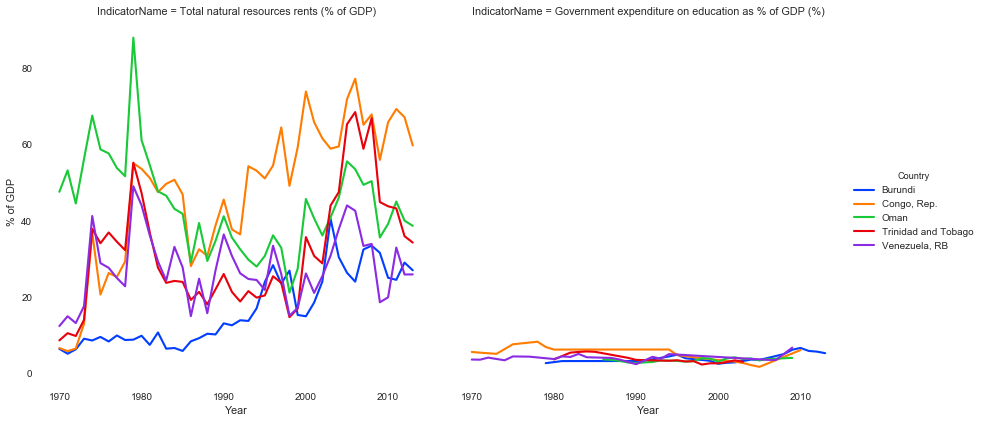

Graph 6. Now we have countries that at least have 15 years worth of data in 
the Education Expenditure indicator.


In [23]:
#Filter rents and education dataframe to get a new top 5 of 
#countries with highest rents average:
top_5_rentsdf = focused_df[focused_df['CountryName'].isin(high_rentsrank_df.head().index)]

#Plot again two charts to compare the Education indicator with the Rents indicator over time:
g5 = sns.FacetGrid(top_5_rentsdf,col='IndicatorName',height=6,hue='CountryName',palette='bright')
g5.map(sns.lineplot,'Year','Value',linewidth=2.1).set_axis_labels('Year','% of GDP')
g5.add_legend(title='Country')
sns.despine(left=True,bottom=True)
plt.show()   
print("Graph 6. Now we have countries that at least have 15 years worth of data in \n\
the Education Expenditure indicator.")

In [24]:
#Now a proper correlation between variables can be done:
for country in high_rentsrank_df.head().index:
    print(country,'correlation between indicators is:',correlation(focused_df,country,
                              'Government expenditure on education as % of GDP (%)',
                              'Total natural resources rents (% of GDP)')[1])

Congo, Rep. correlation between indicators is: -0.47374
Oman correlation between indicators is: -0.02349
Trinidad and Tobago correlation between indicators is: -0.05403
Venezuela, RB correlation between indicators is: -0.30222
Burundi correlation between indicators is: 0.63321


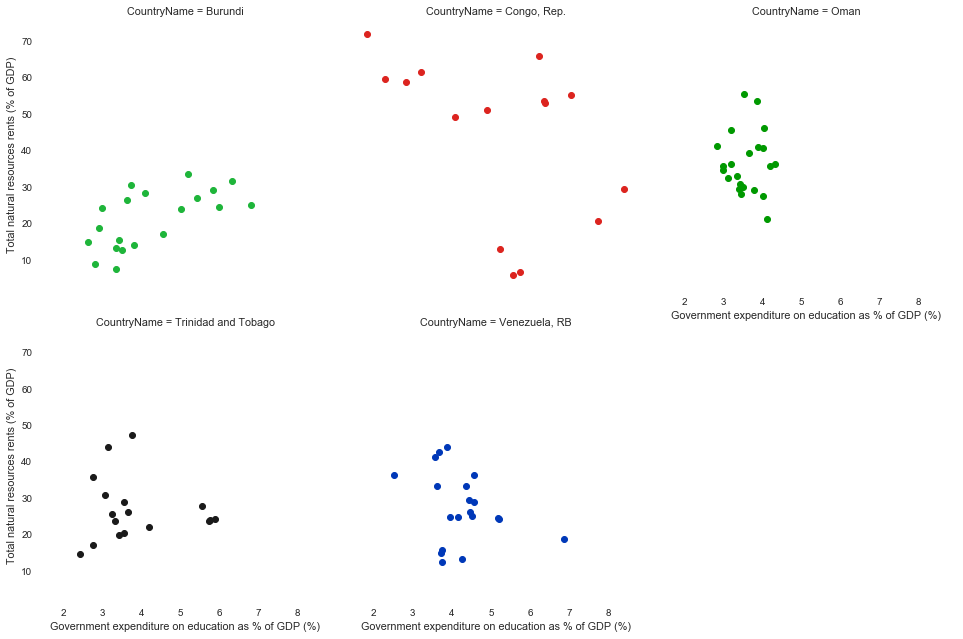

Graph 7. Except for Burundi, which resembles something like a positive correlation, no 
country shows a correlation between the variables.


In [25]:
# top_5_rentsdf['Year'].value_counts()
#SCATTER PLOTS (plotting the correlation between the indicators)

#Pivot so a new table is created with a column for each indicator:
scatter_df = pd.pivot_table(top_5_rentsdf,values='Value',columns='IndicatorName',index=['CountryName','Year'])
#create again the column 'CountryName' because pivot_table turned it into an index:
scatter_df['CountryName'] = scatter_df.index.get_level_values('CountryName')

#using the seaborn code to produce the scatter plots for each country:
g6 = sns.FacetGrid(scatter_df,col='CountryName',col_wrap=3,height=4.5,
                   hue='CountryName',palette=['#1eb53a','#dc241f','#009900','k','#0038b8'])
g6.map(plt.scatter,
       'Government expenditure on education as % of GDP (%)',
       'Total natural resources rents (% of GDP)')
sns.despine(left=True,bottom=True)
plt.show()
print("Graph 7. Except for Burundi, which resembles something like a positive correlation, no \n\
country shows a correlation between the variables.")

In [26]:
#One last comparison to see how the rents income vary for the top 5 countries with 
#high education expenditure and the top 5 countries with high rents

#First join the dataframes containing both top 5s:
hi_edu_rents_df = top_5_df[top_5_df
                           ['IndicatorName']=='Total natural resources rents (% of GDP)'] \
                           .assign(Category='Rents of top 5 Countries with High Education Expenditure Average')

hi_rents_df = top_5_rentsdf[top_5_rentsdf
                            ['IndicatorName']=='Total natural resources rents (% of GDP)'] \
                            .assign(Category='Rents of top 5 Countries with High Natural Resources Rents Average')

all_top_countries = pd.concat([hi_edu_rents_df,hi_rents_df])
all_top_countries.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,Category
314656,Canada,CAN,Total natural resources rents (% of GDP),NY.GDP.TOTL.RT.ZS,1970,4.014234,Rents of top 5 Countries with High Education E...
319628,Denmark,DNK,Total natural resources rents (% of GDP),NY.GDP.TOTL.RT.ZS,1970,0.210377,Rents of top 5 Countries with High Education E...
323236,Finland,FIN,Total natural resources rents (% of GDP),NY.GDP.TOTL.RT.ZS,1970,5.592475,Rents of top 5 Countries with High Education E...
330935,Israel,ISR,Total natural resources rents (% of GDP),NY.GDP.TOTL.RT.ZS,1970,0.239262,Rents of top 5 Countries with High Education E...
343518,Norway,NOR,Total natural resources rents (% of GDP),NY.GDP.TOTL.RT.ZS,1970,1.063054,Rents of top 5 Countries with High Education E...


C:\Users\JORGE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


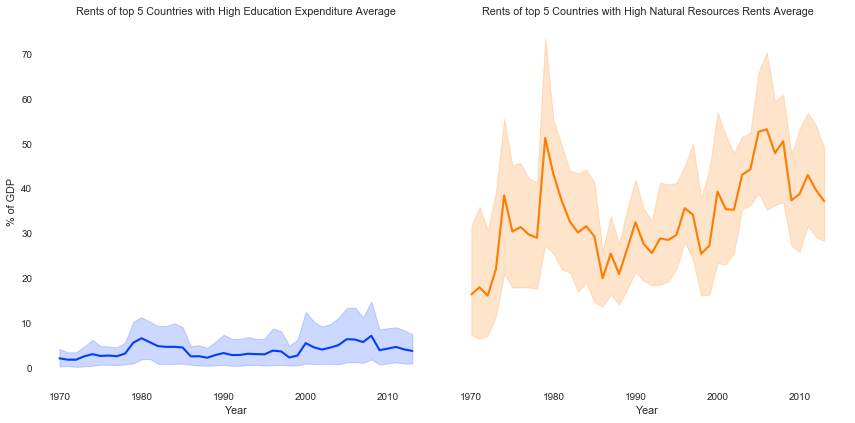

Graph 8.


In [27]:
#Plot the comparison
g7 = sns.FacetGrid(all_top_countries,col='Category',height=6,hue='Category',palette='bright')
g7.map(sns.lineplot,'Year','Value',linewidth=2.1).set_axis_labels('Year','% of GDP')
sns.despine(left=True,bottom=True)
#Change the default titles of the plots:
[plt.setp(ax.texts, text="") for ax in g7.axes.flat] # remove the original texts
                                                    # important to add this before setting titles
g7.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show() 
print('Graph 8.')

## Conclusion
The data didn't give definitive results, at least through this exercise, regarding the relationship between a government's high expenditure in education and the rents received from natural resources as a percentage of GDP. One big takeaway, is that countries that historically have a high rent from the extraction of natural resources don't have enough data regarding their expenditure in education, meaning probably that they didn't have data to show for it because they didn't invest a percentage of the GDP in education, and that countries that have invested have done so very little, as shown in graphs 5 and 6 above. On the other hand, some countries that invest highly in education are still receiving high rents from natural resources, as shown in graph 3, but not as much as the countries with the highest rents, as shown in graph 8.